In [1]:
import pandas as pd # 데이터프레임 형태를 다룰 수 있는 라이브러리
import numpy as np
from sklearn.model_selection import train_test_split # 전체 데이터를 학습 데이터와 평가 데이터로 나눈다.

# ANN
import torch
from torch import nn, optim # torch 내의 세부적인 기능을 불러온다. (신경망 기술, 손실함수, 최적화 방법 등)
from torch.utils.data import DataLoader, Dataset # 데이터를 모델에 사용할 수 있도록 정리해 주는 라이브러리
import torch.nn.functional as F # torch 내의 세부적인 기능을 불러온다. (신경망 기술 등)

# Loss
from sklearn.metrics import mean_squared_error # Regression 문제의 평가를 위해 MSE(Mean Squared Error)를 불러온다.

# Plot
import matplotlib.pyplot as plt # 시각화 도구
import seaborn as sns

In [2]:
from tensorflow.python.client import device_lib   # 이는 나중에 GPU를 사용하고자 할때 필요함.
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 529323985227978668
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9894363136
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18392193070486966117
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [3]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [4]:
import pandas as pd

df = pd.read_excel("../01. 데이터/Data for headed bars_for DataFrame_220817.xlsx", skiprows = 17, engine = 'openpyxl')
df = pd.DataFrame(df, columns = ["No.", "Author", "Year", "Test type", "Remark", "Specimen", "fy", "ld", "fc", "db", "b", "cso,avg",
                                 "cbc", "csi", "n", "cb", "Ah/Ab", "fsu,test", "dtr", "ntr", "st"]) # st 제거시
df

,No.,Author,Year,Test type,Remark,Specimen,fy,ld,fc,db,...,"cso,avg",cbc,csi,n,cb,Ah/Ab,"fsu,test",dtr,ntr,st
0,1.0,Wright,NaN,Stub-beam,NaN,1-TH01-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,45.47,9.395954,376.153911,0.000,0.0,12.7
1,2.0,Wright,NaN,Stub-beam,NaN,1-TH02-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,45.39,9.395954,388.271356,0.000,0.0,12.7
2,3.0,Wright,NaN,Stub-beam,NaN,1-TH03-P-NS-2DB-292,517.500000,12.70,28.460000,25.4,...,101.80,305.00,0.0,1.0,47.12,9.395954,364.470642,0.000,0.0,12.7
3,4.0,Wright,NaN,Stub-beam,NaN,2-TH04-NP-3S1-208-19,517.500000,285.75,33.630000,25.4,...,101.80,305.00,0.0,1.0,47.96,9.395954,482.092746,9.500,3.0,127.0
4,5.0,Wright,NaN,Stub-beam,NaN,2-TH05-NP-3S1-208-19,517.500000,285.75,33.630000,25.4,...,101.80,305.00,0.0,1.0,50.80,9.395954,462.692993,9.500,3.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-4#5-6,889.655172,154.94,35.724138,25.4,...,769.62,769.62,NaN,1.0,NaN,5.100000,457.241379,15.875,2.0,25.4
474,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-4#5-6,889.655172,172.72,37.655172,25.4,...,769.62,769.62,NaN,1.0,NaN,5.100000,466.896552,15.875,2.0,25.4
475,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-6#5-6,889.655172,160.02,37.655172,25.4,...,774.70,774.70,NaN,1.0,NaN,5.100000,412.413793,15.875,3.0,25.4
476,NaN,Shao,NaN,Pullout,NaN,8-5-F4.1-6#5-6,889.655172,167.64,37.655172,25.4,...,762.00,762.00,NaN,1.0,NaN,5.100000,488.275862,15.875,3.0,25.4


In [5]:
y= df["fsu,test"]
y

0      376.153911
1      388.271356
2      364.470642
3      482.092746
4      462.692993
          ...    
473    457.241379
474    466.896552
475    412.413793
476    488.275862
477    459.310345
Name: fsu,test, Length: 478, dtype: float64

In [6]:
df.info()   # dtr, Ntr 데이터가 상대적으로 모자라니, 이 둘을 feature에서 제거함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   No.        431 non-null    float64
 1   Author     463 non-null    object 
 2   Year       398 non-null    float64
 3   Test type  463 non-null    object 
 4   Remark     206 non-null    object 
 5   Specimen   463 non-null    object 
 6   fy         463 non-null    float64
 7   ld         463 non-null    float64
 8   fc         463 non-null    float64
 9   db         463 non-null    float64
 10  b          463 non-null    float64
 11  cso,avg    463 non-null    float64
 12  cbc        422 non-null    float64
 13  csi        431 non-null    float64
 14  n          463 non-null    float64
 15  cb         427 non-null    float64
 16  Ah/Ab      463 non-null    float64
 17  fsu,test   440 non-null    float64
 18  dtr        438 non-null    float64
 19  ntr        438 non-null    float64
 20  st        

In [7]:
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "dtr", "Ntr", "st"]] # 최대변수 사용
#X = df[["fy", "Ld", "fcm", "db", "b", "cos,avg", "cth", "ch", "Nh", "Bottom cover", "Ah/Ab", "st"]] # 누락값 많은 변수 미사용
# Test type - One-hot encoding
X = df[["Test type", "fy", "ld", "fc", "db", "b", "cso,avg","cbc", "csi", "n", "cb", "Ah/Ab", "dtr", "ntr", "st"]] # 범주형 데이터: Test type 포함
print(X["Test type"].value_counts()) # 범주 갯수 확인

Joint type    297
CCT            52
Lap splice     49
Stub-beam      33
Pullout        32
Name: Test type, dtype: int64


In [8]:
X = pd.get_dummies(data = X, columns = ["Test type"], prefix = "Test_type") # One-hot Endcoding 실행 -> (0, 0, 0, 1, 0), (1, 0, 0, 0, 0), ...
X

,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.47,9.395954,0.000,0.0,12.7,0,0,0,0,1
1,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.39,9.395954,0.000,0.0,12.7,0,0,0,0,1
2,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,47.12,9.395954,0.000,0.0,12.7,0,0,0,0,1
3,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,47.96,9.395954,9.500,3.0,127.0,0,0,0,0,1
4,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,50.80,9.395954,9.500,3.0,127.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,889.655172,154.94,35.724138,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,15.875,2.0,25.4,0,0,0,1,0
474,889.655172,172.72,37.655172,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,15.875,2.0,25.4,0,0,0,1,0
475,889.655172,160.02,37.655172,25.4,1524.0,774.70,774.70,NaN,1.0,NaN,5.100000,15.875,3.0,25.4,0,0,0,1,0
476,889.655172,167.64,37.655172,25.4,1524.0,762.00,762.00,NaN,1.0,NaN,5.100000,15.875,3.0,25.4,0,0,0,1,0


In [9]:
y2 = y[~y.isnull()]
y2

0      376.153911
1      388.271356
2      364.470642
3      482.092746
4      462.692993
          ...    
473    457.241379
474    466.896552
475    412.413793
476    488.275862
477    459.310345
Name: fsu,test, Length: 440, dtype: float64

In [10]:
X = X[~y.isnull()]
X

,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.47,9.395954,0.000,0.0,12.7,0,0,0,0,1
1,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,45.39,9.395954,0.000,0.0,12.7,0,0,0,0,1
2,517.500000,12.70,28.460000,25.4,229.0,101.80,305.00,0.0,1.0,47.12,9.395954,0.000,0.0,12.7,0,0,0,0,1
3,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,47.96,9.395954,9.500,3.0,127.0,0,0,0,0,1
4,517.500000,285.75,33.630000,25.4,229.0,101.80,305.00,0.0,1.0,50.80,9.395954,9.500,3.0,127.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,889.655172,154.94,35.724138,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,15.875,2.0,25.4,0,0,0,1,0
474,889.655172,172.72,37.655172,25.4,1524.0,769.62,769.62,NaN,1.0,NaN,5.100000,15.875,2.0,25.4,0,0,0,1,0
475,889.655172,160.02,37.655172,25.4,1524.0,774.70,774.70,NaN,1.0,NaN,5.100000,15.875,3.0,25.4,0,0,0,1,0
476,889.655172,167.64,37.655172,25.4,1524.0,762.00,762.00,NaN,1.0,NaN,5.100000,15.875,3.0,25.4,0,0,0,1,0


In [11]:
# X.fillna(0, inplace = True)   # 빈 데이터를을 모두 0으로 채우는 것은 잘못된 결과를 주어서 위험합니다. 차라리 다음과 같이 데이터를 없애는 게 낫습니다.
pd.options.display.max_rows=None

X.dropna(inplace = True)
X


C:\Users\baekjw\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.470000,9.395954,0.000,0.0,12.700,0,0,0,0,1
1,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.390000,9.395954,0.000,0.0,12.700,0,0,0,0,1
2,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.120000,9.395954,0.000,0.0,12.700,0,0,0,0,1
3,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.960000,9.395954,9.500,3.0,127.000,0,0,0,0,1
4,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,50.800000,9.395954,9.500,3.0,127.000,0,0,0,0,1
5,517.500000,292.100,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.730000,9.395954,9.500,3.0,127.000,0,0,0,0,1
6,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,0.000,0.0,289.052,0,0,0,0,1
7,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,0.000,0.0,289.052,0,0,0,0,1
8,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,49.480000,9.395954,0.000,0.0,289.052,0,0,0,0,1
9,517.500000,285.750,33.440000,25.400,229.00,101.80,305.000000,0.000000,1.0,82.190000,9.395954,9.500,3.0,76.000,0,0,0,0,1


In [12]:
y2 = y2[X.index] # 목표값도 X와 동일하게 indexing
y2

0       376.153911
1       388.271356
2       364.470642
3       482.092746
4       462.692993
5       453.476630
6       293.542144
7       307.317351
8       330.585213
9       480.257367
10      486.138473
11      445.325971
12      451.562310
13      446.549556
14      447.417907
15      533.108373
16      518.622698
17      517.221495
18      524.859038
19      504.827757
20      485.526680
21      510.274686
22      499.834738
23      490.618375
24      492.631371
25      457.601298
26      507.472281
27      515.978174
28      520.813311
29      527.404886
30      490.697316
31      502.281909
32      523.280218
33      426.000000
34      456.000000
35      471.000000
36      451.000000
37      319.000000
38      386.000000
39      458.000000
40      458.000000
41      472.000000
42      472.000000
43        0.000000
44        0.000000
45      420.000000
46      472.000000
47      413.000000
48      458.000000
49      421.000000
50      459.000000
51      413.000000
52      471.

In [13]:
# y2 = 0인 값을 제거. 
y2 = y2.loc[(y2 != 0)]
y2

0       376.153911
1       388.271356
2       364.470642
3       482.092746
4       462.692993
5       453.476630
6       293.542144
7       307.317351
8       330.585213
9       480.257367
10      486.138473
11      445.325971
12      451.562310
13      446.549556
14      447.417907
15      533.108373
16      518.622698
17      517.221495
18      524.859038
19      504.827757
20      485.526680
21      510.274686
22      499.834738
23      490.618375
24      492.631371
25      457.601298
26      507.472281
27      515.978174
28      520.813311
29      527.404886
30      490.697316
31      502.281909
32      523.280218
33      426.000000
34      456.000000
35      471.000000
36      451.000000
37      319.000000
38      386.000000
39      458.000000
40      458.000000
41      472.000000
42      472.000000
45      420.000000
46      472.000000
47      413.000000
48      458.000000
49      421.000000
50      459.000000
51      413.000000
52      471.000000
53      376.000000
54      460.

In [14]:
X = X.loc[y2.index] # y=0인 index의 X값도 제거
X

,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
0,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.470000,9.395954,0.000,0.0,12.700,0,0,0,0,1
1,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,45.390000,9.395954,0.000,0.0,12.700,0,0,0,0,1
2,517.500000,12.700,28.460000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.120000,9.395954,0.000,0.0,12.700,0,0,0,0,1
3,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.960000,9.395954,9.500,3.0,127.000,0,0,0,0,1
4,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,50.800000,9.395954,9.500,3.0,127.000,0,0,0,0,1
5,517.500000,292.100,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.730000,9.395954,9.500,3.0,127.000,0,0,0,0,1
6,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,0.000,0.0,289.052,0,0,0,0,1
7,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,47.680000,9.395954,0.000,0.0,289.052,0,0,0,0,1
8,517.500000,289.052,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,49.480000,9.395954,0.000,0.0,289.052,0,0,0,0,1
9,517.500000,285.750,33.440000,25.400,229.00,101.80,305.000000,0.000000,1.0,82.190000,9.395954,9.500,3.0,76.000,0,0,0,0,1


In [15]:
##학습과 실험 데이터를 분류하고 train과 valid 데이터를 분류한뒤

In [16]:
# Train, Valid, Test Set으로 분류

In [17]:
# 1. Train + Valid : Test  = 0.9 : 0.1 --> 먼저 9:1로 나누고

In [18]:
from sklearn.model_selection import train_test_split

tf.random.set_seed(142)

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.20, random_state=142)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((288, 19), (73, 19), (288,), (73,))

In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 354 to 347
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fy                    288 non-null    float64
 1   ld                    288 non-null    float64
 2   fc                    288 non-null    float64
 3   db                    288 non-null    float64
 4   b                     288 non-null    float64
 5   cso,avg               288 non-null    float64
 6   cbc                   288 non-null    float64
 7   csi                   288 non-null    float64
 8   n                     288 non-null    float64
 9   cb                    288 non-null    float64
 10  Ah/Ab                 288 non-null    float64
 11  dtr                   288 non-null    float64
 12  ntr                   288 non-null    float64
 13  st                    288 non-null    float64
 14  Test_type_CCT         288 non-null    uint8  
 15  Test_type_Joint type 

In [20]:
print(X_train["Test_type_CCT"].value_counts())
print(X_train["Test_type_Lap splice"].value_counts())
print(X_train["Test_type_Joint type"].value_counts())
print(X_train["Test_type_Stub-beam"].value_counts())
#print(X_train["Test type"].value_counts()) # 범주 갯수 확인

0    252
1     36
Name: Test_type_CCT, dtype: int64
0    282
1      6
Name: Test_type_Lap splice, dtype: int64
1    222
0     66
Name: Test_type_Joint type, dtype: int64
0    264
1     24
Name: Test_type_Stub-beam, dtype: int64


In [21]:
# 2. Train : Valid = 8: 2  --> 9중 20%를 valid로 가져옴

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20,random_state=142)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, 

((230, 19), (58, 19), (230,), (58,))

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler


scX = MinMaxScaler()                    # X의 scaler 정의
X_train_scaled = scX.fit_transform(X_train)    
X_valid_scaled = scX.transform(X_valid)
X_test_scaled = scX.transform(X_test)

scY = MinMaxScaler()                    # y의 scaler 정의
y_train_scaled = scY.fit_transform(y_train.values.reshape(-1,1)) # y_train.values.reshape(-1,1) 는 Pandas Series를 조작하여 차원조절
y_valid_scaled = scY.transform(y_valid.values.reshape(-1,1))
y_test_scaled = scY.transform(y_test.values.reshape(-1,1))

In [24]:
X_train

,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam
291,799.310345,368.300,38.413793,25.400,429.26,63.50,76.200000,66.886667,4.0,260.350000,10.100000,9.525,10.0,76.200,0,1,0,0,0
4,517.500000,285.750,33.630000,25.400,229.00,101.80,305.000000,0.000000,1.0,50.800000,9.395954,9.500,3.0,127.000,0,0,0,0,1
325,889.655172,309.118,85.241379,25.400,381.00,63.50,76.200000,50.800000,4.0,260.350000,10.100000,0.000,0.0,309.118,0,1,0,0,0
384,931.034483,304.800,27.310345,35.814,543.56,60.96,93.980000,350.012000,2.0,508.000000,4.800000,12.700,4.0,203.200,0,1,0,0,0
322,889.655172,309.118,83.034483,25.400,386.08,66.04,73.660000,88.900000,3.0,260.350000,5.100000,12.700,10.0,76.200,0,1,0,0,0
395,889.655172,256.540,33.655172,25.400,444.50,68.58,80.010000,256.540000,2.0,508.000000,5.100000,12.700,10.0,127.000,0,1,0,0,0
61,433.000000,381.000,28.000000,36.000,215.90,89.95,50.800000,0.000000,1.0,83.600000,2.560000,0.000,0.0,252.000,1,0,0,0,0
282,827.586207,365.252,37.379310,25.400,434.34,64.77,85.090000,254.000000,2.0,260.350000,10.500000,9.525,10.0,76.200,0,1,0,0,0
396,889.655172,252.476,33.655172,25.400,439.42,66.04,82.550000,256.540000,2.0,508.000000,10.100000,12.700,10.0,127.000,0,1,0,0,0
415,799.310345,435.102,74.896552,35.814,556.26,71.12,99.060000,342.392000,2.0,508.000000,5.500000,0.000,0.0,435.102,0,1,0,0,0


### 데이터 분포

In [25]:
X_train_y_train = X_train
X_valid_y_valid = X_valid
X_test_y_test = X_test

In [26]:
X_train_y_train["y"] = y_train
X_valid_y_valid["y"] = y_valid
X_test_y_test["y"] = y_test

C:\Users\baekjw\AppData\Local\Temp/ipykernel_37228/911334918.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_y_test["y"] = y_test


In [27]:
X_train_y_train.corr()

,fy,ld,fc,db,b,"cso,avg",cbc,csi,n,cb,Ah/Ab,dtr,ntr,st,Test_type_CCT,Test_type_Joint type,Test_type_Lap splice,Test_type_Pullout,Test_type_Stub-beam,y
fy,1.000000,-0.210739,0.167699,-0.307873,0.517864,-0.257657,-0.213943,0.430093,0.657583,0.466226,0.153835,0.208707,0.384743,-0.060731,-0.413599,0.608682,-0.054698,NaN,-0.402226,0.413114
ld,-0.210739,1.000000,-0.320546,0.709259,0.220534,0.118207,-0.218849,0.134619,-0.085090,0.374016,-0.153039,0.085597,-0.030586,0.557076,0.157234,-0.040811,-0.068099,NaN,-0.093445,-0.071444
fc,0.167699,-0.320546,1.000000,-0.104031,0.162349,-0.585985,-0.236558,0.320185,0.246240,-0.111751,0.025787,0.007426,0.003522,-0.144706,-0.295160,0.367299,-0.048922,NaN,-0.178524,0.374107
db,-0.307873,0.709259,-0.104031,1.000000,0.413009,0.016778,-0.192911,0.383104,-0.089519,0.417606,-0.261530,0.079451,-0.078206,0.520272,-0.055040,0.146345,-0.118097,NaN,-0.095431,-0.299974
b,0.517864,0.220534,0.162349,0.413009,1.000000,-0.119813,-0.219219,0.749648,0.519047,0.587668,-0.075854,0.179952,0.213862,0.296130,-0.471589,0.537845,0.235543,NaN,-0.375965,0.149451
"cso,avg",-0.257657,0.118207,-0.585985,0.016778,-0.119813,1.000000,0.672117,-0.413549,-0.271997,-0.032232,0.147585,0.079536,0.072663,-0.049972,-0.007216,-0.416278,0.098185,NaN,0.597758,-0.253033
cbc,-0.213943,-0.218849,-0.236558,-0.192911,-0.219219,0.672117,1.000000,-0.371549,-0.279858,-0.232077,0.313956,0.149016,0.102373,-0.293260,-0.271376,-0.390622,0.062067,NaN,0.900554,-0.240517
csi,0.430093,0.134619,0.320185,0.383104,0.749648,-0.413549,-0.371549,1.000000,0.104320,0.515919,-0.077720,0.170327,0.160143,0.230136,-0.377962,0.612985,-0.133851,NaN,-0.410518,0.309037
n,0.657583,-0.085090,0.246240,-0.089519,0.519047,-0.271997,-0.279858,0.104320,1.000000,0.304911,0.001601,0.099611,0.213382,0.058916,-0.390008,0.541275,0.176485,NaN,-0.449767,0.170240
cb,0.466226,0.374016,-0.111751,0.417606,0.587668,-0.032232,-0.232077,0.515919,0.304911,1.000000,0.041693,0.274465,0.343394,0.272107,-0.410077,0.619682,-0.187260,NaN,-0.353248,-0.078047


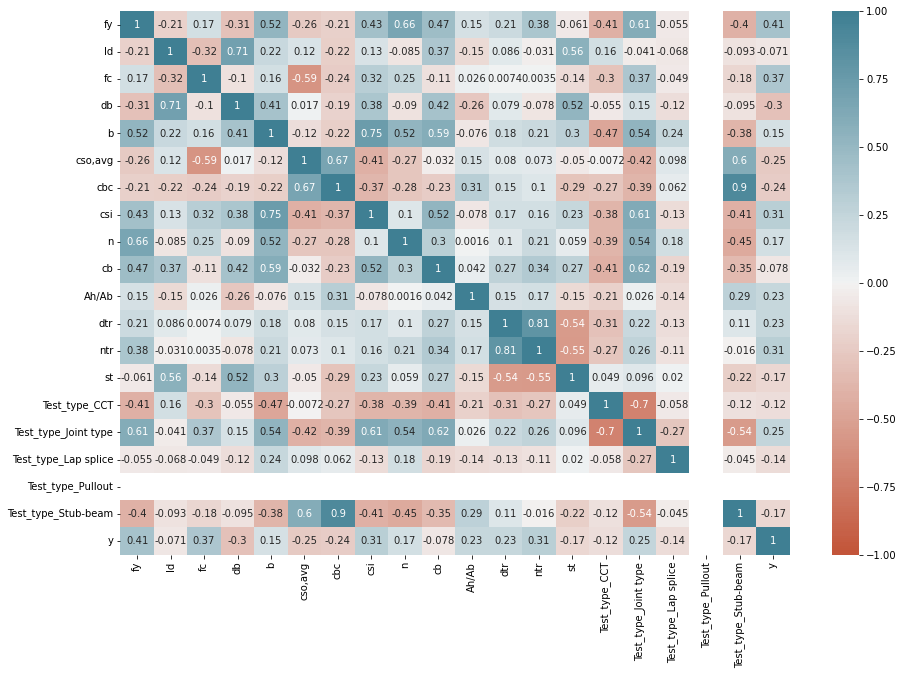

In [28]:
fig= plt.figure(figsize = (15, 10))
ax = sns.heatmap(X_train_y_train.corr(),
                vmin=-1, vmax=1, center= 0,
                cmap=sns.diverging_palette(20, 220, n = 200), 
                annot=True,
                square=False)
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right')

C:\Users\baekjw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

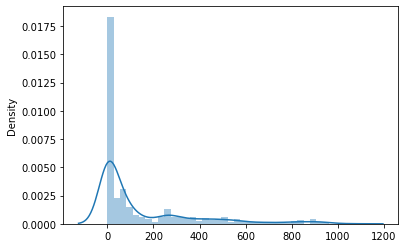

In [29]:
sns.distplot(X_train_y_train)

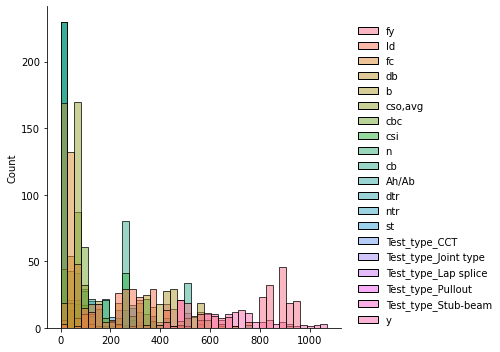

In [30]:
sns.displot(data=X_train_y_train)

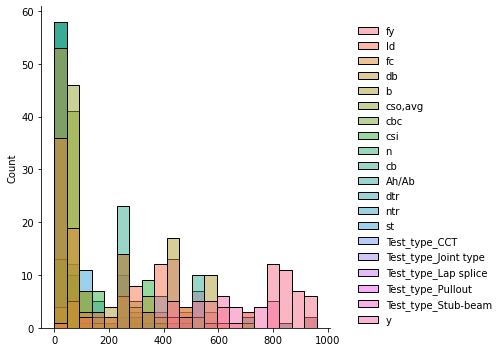

In [31]:
sns.displot(data=X_valid_y_valid)

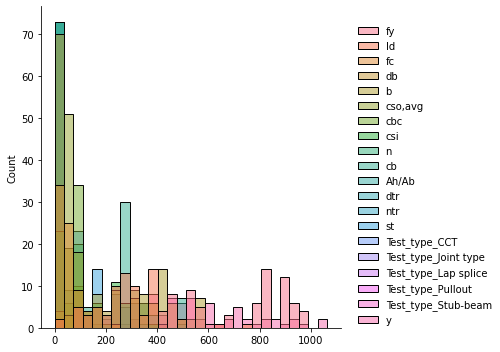

In [32]:
sns.displot(data=X_test_y_test)

C:\Users\baekjw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

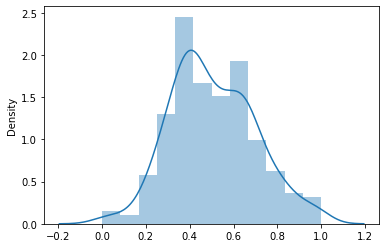

In [33]:
sns.distplot(y_train_scaled)

In [34]:
# 텐서 데이터로 변환하는 클래스(3강 참고)
class TensorData(Dataset):

    def __init__(self, x_data, y_data):
        #self.x_data = x_data.to_numpy().squeeze()
        self.x_data = torch.FloatTensor(x_data)
        #self.y_data = y_data.to_numpy()
        self.y_data = torch.FloatTensor(y_data)
        self.len = self.y_data.shape[0]

    def __getitem__(self, index):

        return self.x_data[index], self.y_data[index] 

    def __len__(self):
        return self.len

In [35]:
trainsets = TensorData(X_train_scaled, y_train_scaled)
trainloader = torch.utils.data.DataLoader(trainsets, batch_size =32, shuffle = True)

validsets = TensorData(X_valid_scaled, y_valid_scaled)
validloader = torch.utils.data.DataLoader(validsets, batch_size =32, shuffle = True)

testsets = TensorData(X_test_scaled, y_test_scaled)
testloader = torch.utils.data.DataLoader(testsets, batch_size =32, shuffle = True)



In [36]:
print(trainsets[0])

(tensor([0.6969, 0.4857, 0.0852, 0.2299, 0.3633, 0.3941, 0.1704, 0.1809, 1.0000,
        0.4627, 0.5797, 0.5991, 0.8333, 0.0867, 0.0000, 1.0000, 0.0000, 0.0000,
        0.0000]), tensor([0.7100]))


In [37]:
class Regressor(nn.Module):
    def __init__(self):
        super().__init__() # 모델 연산 정의
        self.fc1 = nn.Linear(19, 3000, bias=True) # 입력층(19) -> 은닉층1(50)으로 가는 연산
        self.fc2 = nn.Linear(3000, 1250, bias=True) # 은닉층1(50) -> 은닉층2(30)으로 가는 연산
        self.fc3 = nn.Linear(1250, 375, bias=True) # 은닉층1(50) -> 은닉층2(30)으로 가는 연산
        self.fc4 = nn.Linear(375, 100, bias=True) # 은닉층1(50) -> 은닉층2(30)으로 가는 연산
        self.fc5 = nn.Linear(100, 1, bias=True) # 은닉층2(30) -> 출력층(1)으로 가는 연산
        #self.dropout = nn.Dropout(0.2) # 연산이 될 때마다 20%의 비율로 랜덤하게 노드를 없앤다.

    def forward(self, x): # 모델 연산의 순서를 정의
        x = F.relu(self.fc1(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
        x = F.relu(self.fc2(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
        x = F.relu(self.fc3(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
        x = F.relu(self.fc4(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
        x = F.relu(self.fc5(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
        
        #x = self.dropout(F.relu(self.fc2(x))) # 은닉층2에서 드랍아웃을 적용한다.(즉, 30개의 20%인 6개의 노드가 계산에서 제외된다.)
        #x = F.relu(self.fc3(x)) # Linear 계산 후 활성화 함수 ReLU를 적용한다.  
      
        return x
    
# 주의 사항
# 드랍아웃은 과적합(overfitting)을 방지하기 위해 노드의 일부를 배제하고 계산하는 방식이기 때문에 절대로 출력층에 사용해서는 안 된다.

In [38]:
model = Regressor()
criterion = nn.MSELoss()

In [39]:
print(model)

Regressor(
  (fc1): Linear(in_features=19, out_features=3000, bias=True)
  (fc2): Linear(in_features=3000, out_features=1250, bias=True)
  (fc3): Linear(in_features=1250, out_features=375, bias=True)
  (fc4): Linear(in_features=375, out_features=100, bias=True)
  (fc5): Linear(in_features=100, out_features=1, bias=True)
)


In [40]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

In [41]:
n = len(trainloader)
n

8

In [42]:
loss_ = [] # 그래프를 그리기 위한 loss 저장용 리스트 
n = len(trainloader)

for epoch in range(1000): # 1000번 학습을 진행한다.

    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0): # 무작위로 섞인 32개 데이터가 있는 배치가 하나 씩 들어온다.

        inputs, values = data # data에는 X, Y가 들어있다.

        optimizer.zero_grad() # 최적화 초기화
        
        outputs = model(inputs) # 모델에 입력값 대입 후 예측값 산출
        loss = criterion(outputs, values) # 손실 함수 계산
        loss.backward() # 손실 함수 기준으로 역전파 설정 
        optimizer.step() # 역전파를 진행하고 가중치 업데이트
        
        running_loss += loss.item() # epoch 마다 평균 loss를 계산하기 위해 배치 loss를 더한다.
 

    loss_.append(running_loss/n) # MSE(Mean Squared Error) 계산

        
print('Finished Training')

Finished Training


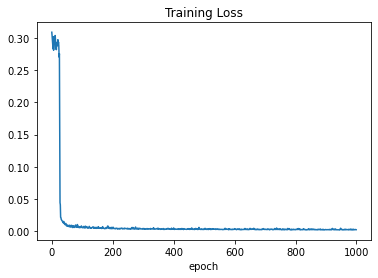

In [43]:
plt.plot(loss_)
plt.title("Training Loss")
plt.xlabel("epoch")
plt.show()

In [44]:
def evaluation(dataloader):
    
    predictions = torch.tensor([], dtype=torch.float) # 예측값을 저장하는 텐서
    actual = torch.tensor([], dtype=torch.float) # 실제값을 저장하는 텐서
        
    with torch.no_grad():
        model.eval() # 평가를 할 때에는 .eval() 반드시 사용해야 한다.
        for data in dataloader:
            inputs, values = data
            outputs = model(inputs)

            predictions = torch.cat((predictions, outputs), 0) # cat을 통해 예측값을 누적
            actual = torch.cat((actual, values), 0) # cat을 통해 실제값을 누적

    rmse = np.sqrt(mean_squared_error(predictions, actual)) # sklearn을 이용하여 RMSE 계산
    
    return rmse  

# 평가 시 .eval()을 사용해야 하는 이유
# 평가 시에는 온전한 모델로 평가를 해야하는데 .eval()이 아닌 .train()인 경우 드랍아웃이 활성화 되어 있다.
# 따라서 드랍아웃이나 배치 정규화 등과 같이 학습 시에만 사용하는 기술들을 평가 시에는 비활성화 해야만 한다.

In [45]:
train_rmse = evaluation(trainloader) # 학습 데이터의 RMSE
test_rmse = evaluation(testloader) # 시험 데이터의 RMSE

print("Train RMSE: ",train_rmse)
print("Test RMSE: ",test_rmse)

# 예시를 위한 단순 비교입니다. 실제 연구에서는 디테일한 비교가 필요합니다.
# 20번의 평가 결과의 평균으로 결과값을 산정 했습니다.
# 데이터를 무작위로 나누고 모델의 초기값도 random initial parameter를 사용했기 때문에 학습을 할 때 마다 결과가 다르게 나올 수 있습니다.
# 이 강의에서는 학습의 흐름(for문)과 모델(Regressor) 부분을 주의 깊게 보시면 됩니다.

Train RMSE:  0.046675898
Test RMSE:  0.07214964
